In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Merging all the data sets
df_2000 = pd.read_excel('/content/atp_2000.xls')
df_2001 = pd.read_excel('/content/atp_2001.xls')
df_2002 = pd.read_excel('/content/atp_2002.xls')
df_2003 = pd.read_excel('/content/atp_2003.xls')
df_2004 = pd.read_excel('/content/atp_2004.xls')
df_2005 = pd.read_excel('/content/atp_2005.xls')
df_2006 = pd.read_excel('/content/atp_2006.xls')
df_2007 = pd.read_excel('/content/atp_2007.xls')
df_2008 = pd.read_excel('/content/atp_2008.xls')
df_2009 = pd.read_excel('/content/atp_2009.xls')
df_2010 = pd.read_excel('/content/atp_2010.xls')
df_2011 = pd.read_excel('/content/atp_2011.xls')
df_2012 = pd.read_excel('/content/atp_2012.xls')
df_2013 = pd.read_excel('/content/atp_2013.xlsx')
df_2014 = pd.read_excel('/content/atp_2014.xlsx')
df_2015 = pd.read_excel('/content/atp_2015.xlsx')
df_2016 = pd.read_excel('/content/atp_2016.xlsx')
df_2017 = pd.read_excel('/content/atp_2017.xlsx')
df_2018 = pd.read_excel('/content/atp_2018.xlsx')
df_2019 = pd.read_excel('/content/atp_2019.xlsx')
df_2020 = pd.read_excel('/content/atp_2020.xlsx')
df_2021 = pd.read_excel('/content/atp_2021.xlsx')
df_2022 = pd.read_excel('/content/atp_2022.xlsx')
df_2023 = pd.read_excel('/content/atp_2023.xlsx')
df_2024 = pd.read_excel('/content/atp_2024.xlsx')
df_player = pd.read_csv('/content/atp_players.csv')




# Combining the datasets
df_combined = pd.concat([df_2000,df_2001, df_2002, df_2003, df_2004, df_2005, df_2006, df_2007, df_2008, df_2009, df_2010, df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022, df_2023, df_2024], ignore_index=True)





/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Q1]Finding success rates in outdoor matches

Top 5 players with the highest win rates in Outdoor matches:
Winner
Nadal R.       0.017973
Federer R.     0.017654
Djokovic N.    0.016658
Ferrer D.      0.011400
Murray A.      0.010592
Name: count, dtype: float64


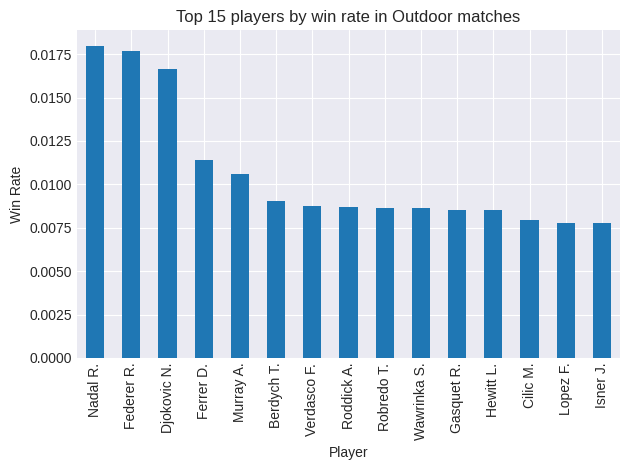

In [24]:

matches_outdoor = df_combined[df_combined['Court'].isin(['Outdoor'])]

player_win_ratio_outdoor = matches_outdoor['Winner'].value_counts() / len(matches_outdoor)

print('Top 5 players with the highest win rates in Outdoor matches:')
print(player_win_ratio_outdoor.head(5))


(player_win_ratio_outdoor.head(15)).plot(kind='bar')
plt.title('Top 15 players by win rate in Outdoor matches')
plt.ylabel('Win Rate')
plt.xlabel('Player')

plt.tight_layout()
plt.show()


Q2] Calculate the conditional probability of a player winning a match given that they won the first set.

In [12]:
completed_matches = df_combined[df_combined['Comment'] == 'Completed']


first_set_win_count = completed_matches[(completed_matches['L1'] == 0) | (completed_matches['W1'] == 0)].shape[0]

first_set_win_and_match_win_count = completed_matches[completed_matches['L1'] == 0].shape[0]

conditional_probability = first_set_win_and_match_win_count / first_set_win_count

print("Conditional probability of winning the match given that the player won the first set:", conditional_probability)

Conditional probability of winning the match given that the player won the first set: 0.9014404852160728


Q3] How many matches are played in each city?

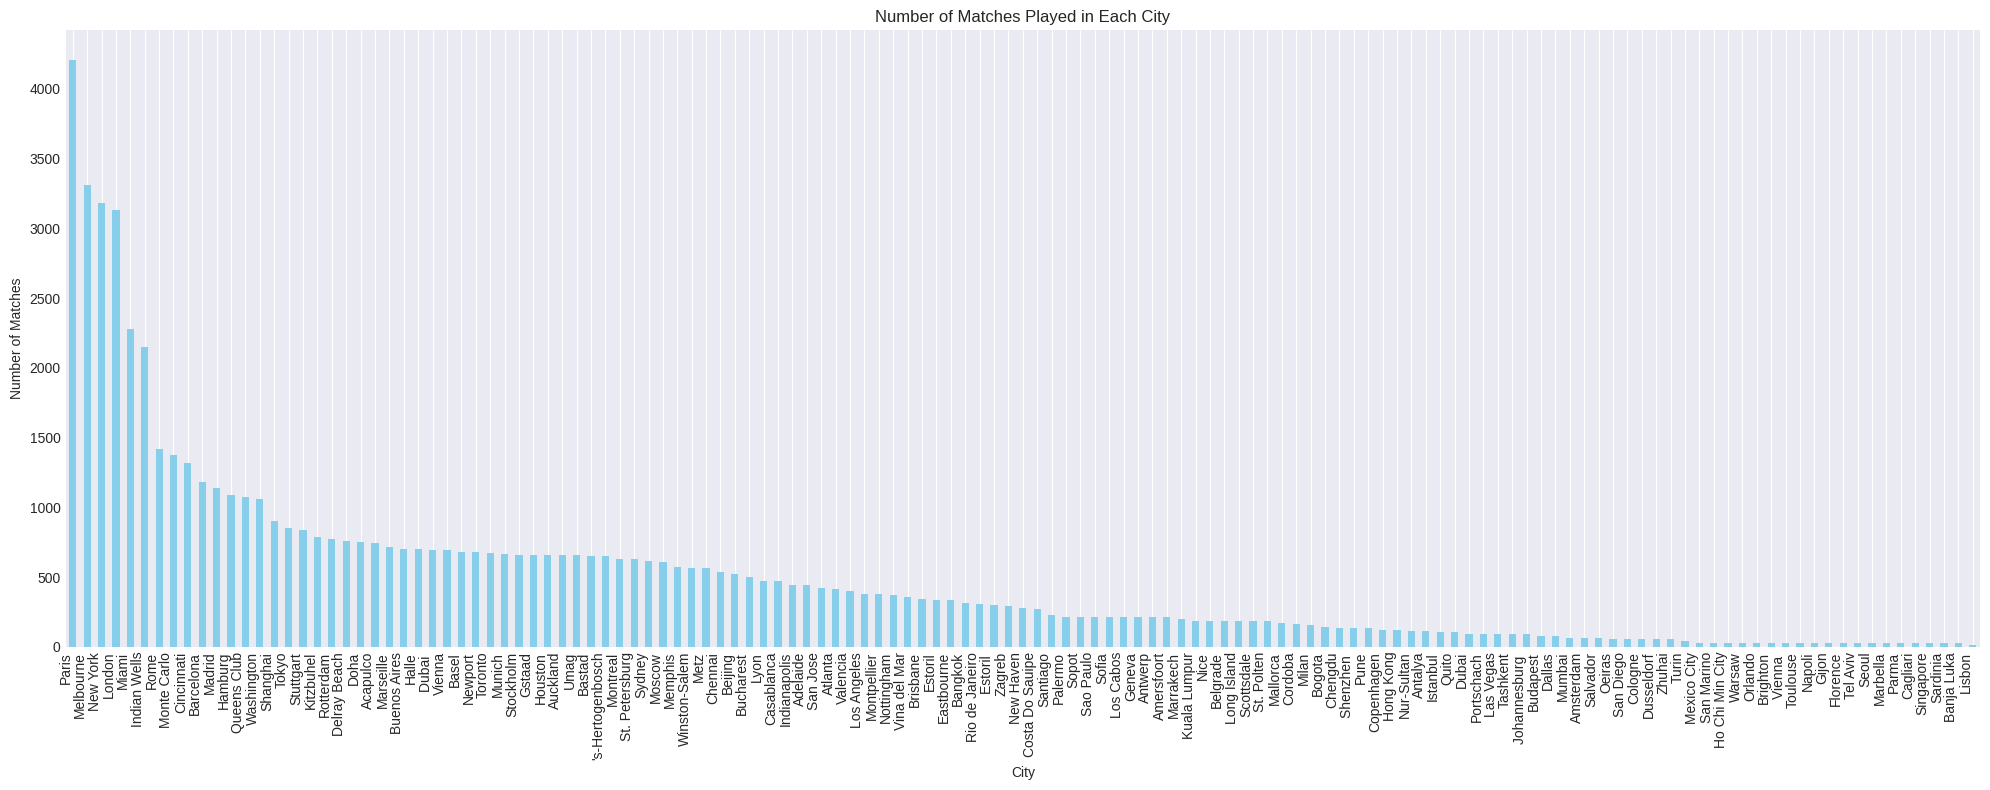

In [13]:
plt.figure(figsize=(20, 8))
df_combined['Location'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Matches Played in Each City')
plt.xlabel('City')
plt.ylabel('Number of Matches')
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Q4] No. of matches won by each player over 24 years

Worst players for each year:
Year
2000        Cherkasov A.
2001       van Lottum J.
2002            Bryan B.
2003         Sirianni J.
2004           Kucera V.
2005        Fleishman Z.
2006          Armando H.
2007       Whitehouse W.
2008            Vemic D.
2009           Gaudio G.
2010      Vinciguerra A.
2011         Duclos P.L.
2012          Fischer M.
2013           Vesely J.
2014        Laaksonen H.
2015           Mektic N.
2016            Cacic N.
2017           Balazs A.
2018             Otte O.
2019          Smyczek T.
2020          Donskoy E.
2021     Seyboth Wild T.
2022           Moriya H.
2023             Bolt A.
2024    Jorda Sanchis D.
Name: Winner, dtype: object


<ipython-input-14-b4e0910647cf>:47: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')  # Change plot style


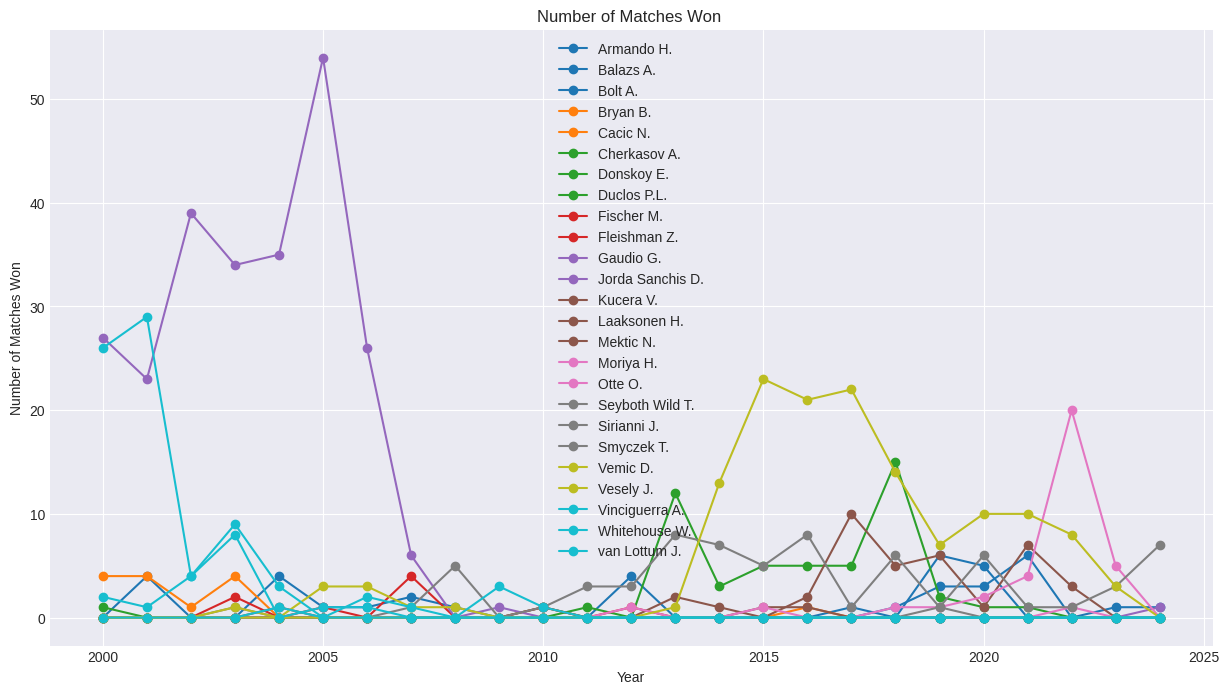

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_combined is your DataFrame

# Convert 'Date' column to datetime format
try:
    df_combined['Date'] = pd.to_datetime(df_combined['Date'], format='%d/%m/%y')
except ValueError:
    print("Error: Date format doesn't match the expected format (dd/mm/yy). Please check your data.")

# Extract year from the 'Date' column
df_combined['Year'] = df_combined['Date'].dt.year

# Find the worst player for each year
worst_players = df_combined.groupby('Year')['Winner'].agg(lambda x: x.value_counts().idxmin())

# Print worst players for each year
print("Worst players for each year:")
print(worst_players)

# Filter matches where the winner is among the worst players
matches_of_worst_players = df_combined[df_combined['Winner'].isin(worst_players)]

# Group by year and player, count the number of wins for each player each year
player_wins_each_year = matches_of_worst_players.groupby(['Year', 'Winner']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(15,8))

# Define colors
colors = plt.cm.tab10(np.linspace(0, 1, len(player_wins_each_year.columns)))

# Plot number of matches won by each player over 24 years
for i, player in enumerate(player_wins_each_year.columns):
    wins = player_wins_each_year[player]
    if wins.any():
        plt.plot(player_wins_each_year.index, wins, marker='o', color=colors[i], label=player)

# Enhancements to the plot
plt.title('Number of Matches Won ')
plt.xlabel('Year')
plt.ylabel('Number of Matches Won')
plt.legend()
plt.grid(True)  # Add grid
plt.style.use('seaborn-darkgrid')  # Change plot style
plt.show()

Q5] Calculate the correlation coefficient of the winning rate and the winning points for each year

In [15]:
dataframes = [df_2000,df_2001,df_2002,df_2003,df_2004,df_2005,df_2006,df_2007,df_2008,df_2009,df_2010,df_2011,df_2012,df_2013,df_2014,df_2015,df_2016,df_2017,df_2018,df_2019,df_2020,df_2021,df_2022,df_2023]  # Add all your DataFrames here

for year, df_year in zip(range(2000, 2000 + len(dataframes)), dataframes):
    if 'WRank' in df_year.columns and 'WPts' in df_year.columns:
        correlation_coefficient = df_year['WRank'].corr(df_year['WPts'])
        print(f"Correlation Coefficient for year {year}: {correlation_coefficient}")
    else:
        print(f"'WPts' not found in the DataFrame for year {year}.")


'WPts' not found in the DataFrame for year 2000.
'WPts' not found in the DataFrame for year 2001.
'WPts' not found in the DataFrame for year 2002.
'WPts' not found in the DataFrame for year 2003.
'WPts' not found in the DataFrame for year 2004.
Correlation Coefficient for year 2005: -0.499283024943781
Correlation Coefficient for year 2006: -0.4101973705461944
Correlation Coefficient for year 2007: -0.43889963281500316
Correlation Coefficient for year 2008: -0.43404230873074917
Correlation Coefficient for year 2009: -0.40297003061544523
Correlation Coefficient for year 2010: -0.4575113525604047
Correlation Coefficient for year 2011: -0.3878656067437486
Correlation Coefficient for year 2012: -0.42177077855310213
Correlation Coefficient for year 2013: -0.43877165686536573
Correlation Coefficient for year 2014: -0.4243487005606218
Correlation Coefficient for year 2015: -0.383538735948183
Correlation Coefficient for year 2016: -0.3516387880692098
Correlation Coefficient for year 2017: -0.43

Q6] What is the distribution of match outcomes (e.g., win, loss, walkover) in the dataset?

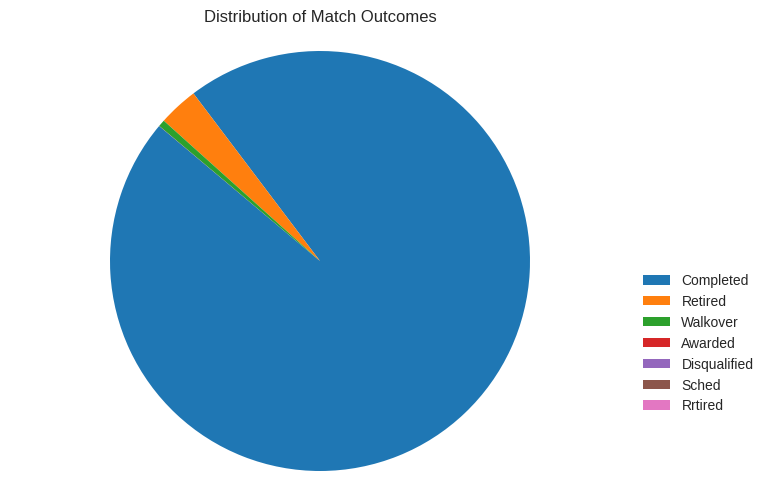

In [16]:
# matches_df = pd.read_excel("tennis_matches.xlsx")  # Assuming the dataset is in Excel format

outcome_counts = df_combined['Comment'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(outcome_counts, labels=None, startangle=140)
plt.title('Distribution of Match Outcomes')
plt.axis('equal')


plt.legend(outcome_counts.index, loc='best', bbox_to_anchor=(1, 0.5))
plt.show()

Q7] Determine the probability distribution of match outcomes (win, loss, retirement) for matches played on different surface types.

In [17]:

completed_matches = df_combined[df_combined['Comment'] == 'Completed']

outcome_counts = completed_matches.groupby(['Surface', 'Winner']).size().unstack(fill_value=0)

outcome_probabilities = outcome_counts.div(outcome_counts.sum(axis=1), axis=0)

print("Probability distribution of match outcomes by surface type:")
print(outcome_probabilities)

Probability distribution of match outcomes by surface type:
Winner    Hajek J.  Abel M.  Acasuso J.  Agamenone F.  Agassi A.  Agenor R.  \
Surface                                                                       
Carpet     0.00000  0.00000    0.002448      0.000000   0.003060   0.000000   
Clay       0.00005  0.00005    0.006616      0.000149   0.001940   0.000149   
Grass      0.00000  0.00000    0.000000      0.000000   0.002769   0.000000   
Hard       0.00000  0.00000    0.001147      0.000000   0.005706   0.000088   

Winner   Aguilar J.  Ahouda A.  Ajdukovic D.  Al Ghareeb M.  ...  Zverev A.  \
Surface                                                      ...              
Carpet      0.00000    0.00000       0.00000       0.000000  ...   0.000000   
Clay        0.00005    0.00005       0.00005       0.000000  ...   0.006118   
Grass       0.00000    0.00000       0.00000       0.000000  ...   0.004664   
Hard        0.00000    0.00000       0.00000       0.000029  ...   0.0

Q8] Covariance between a player's birth year and their height

In [18]:
df_player.dropna(subset=['birth_year', 'height_cm'], inplace=True)

covariance = df_player['birth_year'].cov(df_player['height_cm'])

print("Covariance between a player's birth year and their height:", covariance)

Covariance between a player's birth year and their height: 2.339721134016972


Q9] What is the probability that a match played in Adelaide results in a retirement?

In [19]:
matches_adelaide = df_combined[df_combined['Location'] == 'Adelaide']

total_matches_adelaide = len(matches_adelaide)

retirement_matches_adelaide = matches_adelaide[matches_adelaide['Comment'] == 'Retired'].shape[0]

probability_retirement_adelaide = retirement_matches_adelaide / total_matches_adelaide

print("Probability that a match played in Adelaide results in a retirement:", probability_retirement_adelaide)

Probability that a match played in Adelaide results in a retirement: 0.02696629213483146


Q10] Pie chart showing the distribution of matches played on different surface types.

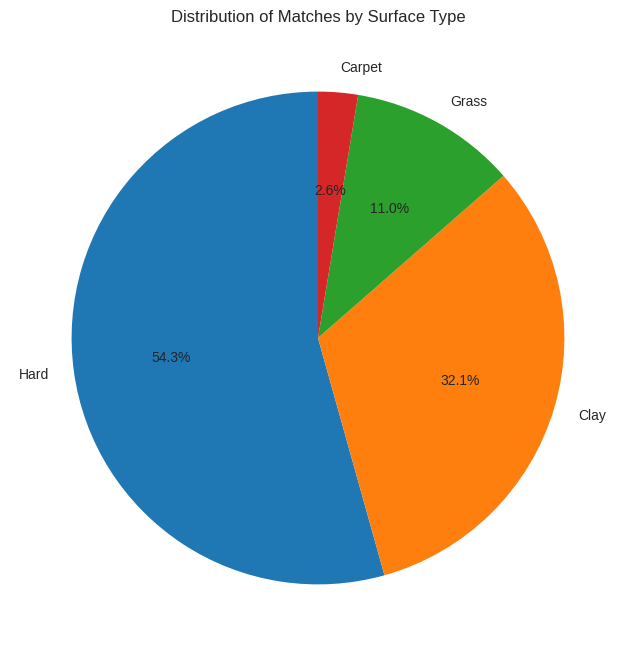

In [20]:
plt.figure(figsize=(8, 8))
df_combined['Surface'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Matches by Surface Type')
plt.ylabel('')
plt.show()

Covariance matrix between match statistics and tournaments for the first 5 tournamnets

In [28]:
import numpy as np

# Define the columns related to match statistics
match_stats_columns = ['Wsets', 'Lsets', 'WRank', 'LRank']

# Filter the dataset for the first 5 tournaments
first_5_tournaments_data = df_combined[df_combined['Tournament'].isin(df_2000['Tournament'].unique()[:5])]

# Replace non-numeric values with NaN
first_5_tournaments_data[match_stats_columns] = first_5_tournaments_data[match_stats_columns].apply(pd.to_numeric, errors='coerce')

# Calculate the covariance matrix
covariance_matrix = first_5_tournaments_data[match_stats_columns].cov()

# Display the covariance matrix
print("Covariance Matrix:")
print(covariance_matrix)


Covariance Matrix:
          Wsets     Lsets        WRank         LRank
Wsets  0.050333  0.006625    -0.466376      1.826503
Lsets  0.006625  0.226360     1.549090     -4.398656
WRank -0.466376  1.549090  4532.214965    463.610574
LRank  1.826503 -4.398656   463.610574  16566.175568


<ipython-input-28-fbbd1bc9e64d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_5_tournaments_data[match_stats_columns] = first_5_tournaments_data[match_stats_columns].apply(pd.to_numeric, errors='coerce')
